In [1]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2024-09-03 23:17:58--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: 'spam.csv.1'

     0K .......... .......... .......... .......... .......... 10%  618K 1s
    50K .......... .......... .......... .......... .......... 20%  916K 1s
   100K .......... .......... .......... .......... .......... 30%  121K 1s
   150K .......... .......... .......... .......... .......... 40%  948K 1s
   200K .......... .......... .......... .......... .......... 50%  360K 1s
   250K .......... .......... .......... .......... .......... 60%  943K 1s
   300K .......... .......... .......... .......... .......... 71% 1016K 0s
   350K .......... .......... .......... .......... .......... 81%  

In [2]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import seaborn as sns


In [11]:
np.random.seed(0)
tf.random.set_seed(0)

df = pd.read_csv('spam.csv',delimiter=",",encoding='ISO-8859-1')
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df = df.rename(columns={"v1":"Labels","v2":"Texts"})

target_map = {'ham': 1, 'spam':0 }
df['target'] = df['Labels'].map(target_map)

# Display the first few rows of the DataFrame
print(df.head())

  Labels                                              Texts  target
0    ham  Go until jurong point, crazy.. Available only ...       1
1    ham                      Ok lar... Joking wif u oni...       1
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...       0
3    ham  U dun say so early hor... U c already then say...       1
4    ham  Nah I don't think he goes to usf, he lives aro...       1


In [15]:
df_train,df_test = train_test_split(df,random_state=42)

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['Texts'])
X_test = vectorizer.transform(df_test['Texts'])

# Data must not be in sparse matrix before passing to tf
X_train = X_train.toarray()
X_test =X_test.toarray()

Y_train = df_train['target']
Y_test = df_test['target']

# Input dimensions
D = X_train.shape[1]

In [16]:
# Build model
i = Input(shape=(D,))
x = Dense(1)(i) # sigmoid included in loss, Dense  ==  w^T * x + b

model = Model(i,x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy']
)
r = model.fit(
    X_train,Y_train,
    validation_data = (X_test,Y_test),
    epochs = 40,
    batch_size = 128
)

Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2515 - loss: 0.6071 - val_accuracy: 0.9512 - val_loss: 0.4160
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9610 - loss: 0.3738 - val_accuracy: 0.9569 - val_loss: 0.3010
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9645 - loss: 0.2736 - val_accuracy: 0.9627 - val_loss: 0.2423
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9721 - loss: 0.2181 - val_accuracy: 0.9655 - val_loss: 0.2050
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9767 - loss: 0.1813 - val_accuracy: 0.9720 - val_loss: 0.1790
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9840 - loss: 0.1549 - val_accuracy: 0.9734 - val_loss: 0.1599
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9856 - loss: 0.1351 - val_accuracy: 0.9756 - val_loss: 0.1453
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.1196 - val_accuracy: 0.9756 - val_loss

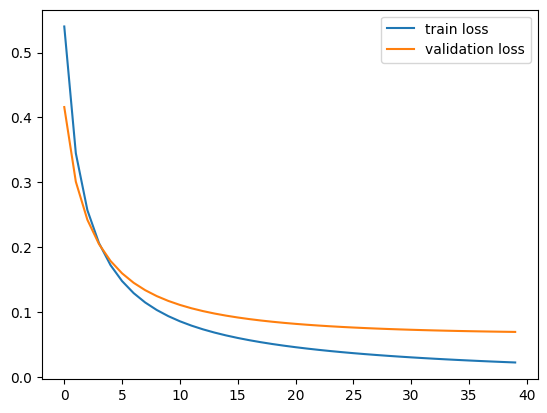

In [18]:
# plot loss per iteration

plt.plot(r.history['loss'],label = "train loss")
plt.plot(r.history['val_loss'],label = "validation loss")
plt.legend()

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


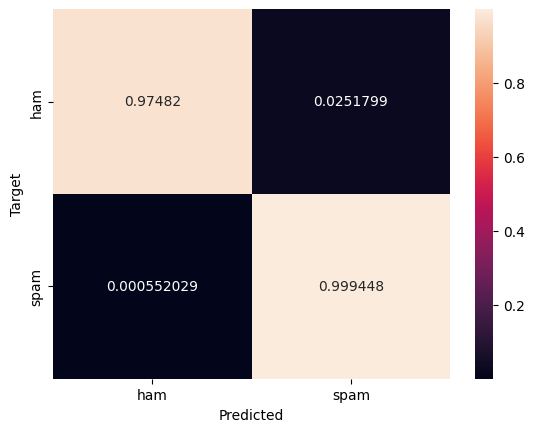

In [19]:
P_train = ((model.predict(X_train) >0) *1.0).flatten()
P_test = ((model.predict(X_test) >0) *1.0).flatten()

cm = confusion_matrix(Y_train,P_train,normalize='true')

# plot cm
def plot_cm(cm):
    classes = ['ham','spam']
    df_cm = pd.DataFrame(cm,index=classes, columns=classes)
    ax = sns.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

plot_cm(cm)

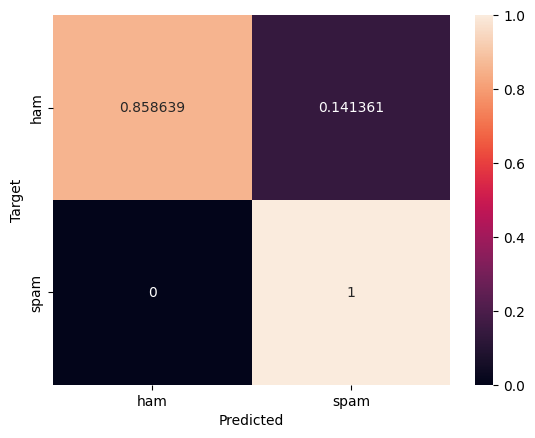

In [20]:
cm_test = confusion_matrix(Y_test,P_test,normalize='true')
plot_cm(cm_test)

In [21]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print(f"Train AUC {roc_auc_score(Y_train,Pr_train)}")
print(f"Test AUC {roc_auc_score(Y_test,Pr_test)}")

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train AUC 0.9999394356995773
Test AUC 0.9874859527314859


In [22]:
print(f"Train F1 {f1_score(Y_train,P_train)}")
print(f"Test F1 {f1_score(Y_test,P_test)}")

Train F1 0.9977955359603197
Test F1 0.9888934594816948


In [23]:
w = model.layers[1].get_weights()
word_index_map = vectorizer.vocabulary_

# check weights for each word
threshold = 2
word_weight_tuples = []

for word, index in word_index_map.items():
    weight = w[0][index]
    if weight > threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples, key = lambda x: -x[1])

# print top 10
for i in range(10):
    word,weight = word_weight_tuples[i]    
    print(word,weight)
        

sir [3.4768755]
later [3.0270584]
gt [2.9583085]
mail [2.9242318]
lt [2.8898127]
me [2.8394437]
ok [2.8103125]
its [2.724036]
happy [2.6624398]
da [2.6588738]


In [24]:
word_weight_tuples = []

for word, index in word_index_map.items():
    weight = w[0][index]
    if weight <- threshold:
        word_weight_tuples.append((word,weight))

word_weight_tuples = sorted(word_weight_tuples, key = lambda x: x[1])

# print top 10
for i in range(10):
    word,weight = word_weight_tuples[i]    
    print(word,weight)

txt [-4.8534174]
text [-4.264804]
stop [-4.2348647]
50 [-4.229522]
uk [-4.2107987]
150p [-3.9588854]
mobile [-3.9554]
http [-3.922586]
www [-3.7644713]
free [-3.74903]


In [ ]:
sample_text = ["txt text stop"]

sample_tokenized = vectorizer.transform(sample_text)
sample_tokenized = sample_tokenized.toarray()

(model.predict(sample_tokenized))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[-5.5210667]], dtype=float32)